In [1]:
#importation des bibliotheque
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D 
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import matplotlib.pyplot as plt 
from cs231n.Face_happy_fost_nd import *

Using TensorFlow backend.


In [2]:
#on implemente la dataset qui va nous servir d entrainenment et de test 
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes = load_dataset()
x_train = train_set_x_orig/255
y_train= train_set_y_orig.T
x_test = test_set_x_orig/255
y_test =  test_set_y_orig.T

y = 1 picture.


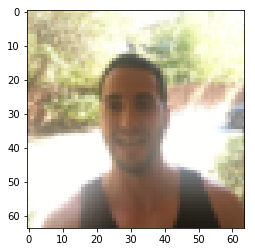

In [3]:
#ici on visualise les images en changeant d 'index '
index = 50
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y_orig[0,index]) +  " picture.")

In [4]:
#recaputulatif des taille de des donnees

print("train_set_y_orig shape = " + str(y_train.shape) )
print("test_set_y_orig shape = " + str(y_test.shape) )
print("x_train shape = " + str(x_train.shape) )
print("x_test shape = " + str(x_test.shape) )
print("train_set_y_orig shape = " + str(train_set_x_orig.shape) )

train_set_y_orig shape = (600, 1)
test_set_y_orig shape = (150, 1)
x_train shape = (600, 64, 64, 3)
x_test shape = (150, 64, 64, 3)
train_set_y_orig shape = (600, 64, 64, 3)


In [5]:
def HappyFace(input_shape):
    img_input=Input(input_shape)
    img = ZeroPadding2D(padding=(3,3))(img_input)
    img = Conv2D(32,(7,7),strides = (1,1), name = 'conv0')(img)
    img = BatchNormalization(axis = 3, name = 'bn0')(img)
    img = Activation('relu')(img)
    img = MaxPooling2D((2, 2), name='max_pool')(img)
    img =Flatten()(img)
    img =Dense(1, activation='sigmoid', name='fc')(img)
    
    model = Model(inputs = img_input, outputs = img, name ='HappyFace')
    
    return model

In [6]:
happymodel = HappyFace((64,64,3))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [7]:
happymodel.compile(optimizer ='Adam', loss = 'binary_crossentropy', metrics =['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [8]:
happymodel.fit(x = x_train,y= y_train, epochs = 10, batch_size = 32)

Epoch 1/10
600/600 [==============================] - 10s 17ms/step - loss: 0.9463 - acc: 0.6767
Epoch 2/10
600/600 [==============================] - 10s 16ms/step - loss: 0.2904 - acc: 0.8850
Epoch 3/10
600/600 [==============================] - 10s 16ms/step - loss: 0.1696 - acc: 0.9333
Epoch 4/10
600/600 [==============================] - 10s 17ms/step - loss: 0.1078 - acc: 0.9633
Epoch 5/10
600/600 [==============================] - 11s 19ms/step - loss: 0.0754 - acc: 0.9767
Epoch 6/10
600/600 [==============================] - 11s 19ms/step - loss: 0.0761 - acc: 0.9833
Epoch 7/10
600/600 [==============================] - 10s 17ms/step - loss: 0.0952 - acc: 0.9683
Epoch 8/10
600/600 [==============================] - 10s 16ms/step - loss: 0.0918 - acc: 0.9667
Epoch 9/10
600/600 [==============================] - 10s 16ms/step - loss: 0.0799 - acc: 0.9750
Epoch 10/10
600/600 [==============================] - 10s 16ms/step - loss: 0.0613 - acc: 0.9800


In [9]:
preds = happymodel.evaluate(x_test,y_test)

print()
print("Loss = "+str(preds[0]))
print("test accuracy ="+str(preds[1]))

150/150 [==============================] - 1s 8ms/step

Loss = 0.2423791734377543
test accuracy =0.9466666642824809


[[0.]]


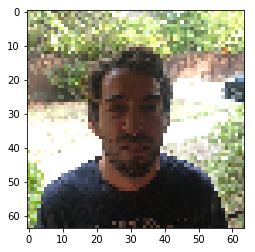

In [10]:
img_path = 'cs231n/keras_Residual_NN/images/my_image.jpg'

img = image.load_img(img_path, target_size=(64,64))
plt.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = preprocess_input(x)

print(happymodel.predict(x))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
__________

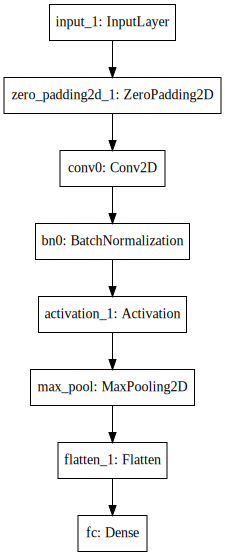

In [11]:
happymodel.summary()
plot_model(happymodel, to_file="happymodel.png")
SVG(model_to_dot(happymodel).create(prog ='dot', format ='svg'))